This notebook contains the sample creation from the FLAMINGO SOAP catalog. We try to mimick the observed cluster sample of 313 clusters with flux $f_X \geq 5 \times 10^{-12} \,\mathrm{erg\,s^{-1}\,cm^{-2}}$ and latitude $|b| > 20^\circ$.

In [2]:
import sys
sys.path.append('../')
import pandas as pd
pd.set_option('display.max_columns', None)      # Display all columns when printing
original_data = pd.read_hdf("/data1/yujiehe/data/halo_properties_in_lightcone0.hdf5")

In [5]:
original_data.head()

,lc_id,redshift,theta_on_lc,phi_on_lc,M_fof_lc,x_lc,y_lc,z_lc,snap_num,MfofSOAP,SOAPID,M500,GasMass,LX0InRestframeWithoutRecentAGNHeating,LX0InRestframeWithoutRecentAGNHeatingCoreExcision,GasTemperatureWithoutRecentAGNHeatingCoreExcision,SpectroscopicLikeTemperatureWithoutRecentAGNHeatingCoreExcision,Y5R500WithoutRecentAGNHeating,Vx,Vy,Vz
0,13494138,0.289412,2.434740,46.845344,5.089802e+12,810.524940,864.491405,50.387261,71,5.093831e+12,13494137,3.616362e+12,4.415763e+10,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,-13.873657,136.326300,-286.77368
1,13492844,0.288434,2.159398,47.195837,1.007841e+13,802.852393,866.875374,44.551823,71,1.008458e+13,13492843,5.454608e+12,6.489427e+10,7.749931e+40,6.142097e+40,2473984.0,2224128.0,2.715453e+41,-189.534910,68.665040,-146.43494
2,13493475,0.287379,2.838580,47.159344,6.340263e+12,800.310973,863.028035,58.359069,71,6.339372e+12,13493474,4.466766e+12,3.952712e+10,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,-194.329100,32.970947,-198.32910
3,13492385,0.285515,2.281295,47.353490,1.101831e+13,792.932866,860.904376,46.626492,71,1.101230e+13,13492384,5.944235e+12,2.813204e+11,3.688661e+41,3.688661e+41,2629632.0,5652480.0,3.586576e+41,-226.034910,166.265140,-223.23492
4,13493858,0.279886,3.055411,45.777673,5.561836e+12,800.853042,822.893445,61.291777,71,5.557688e+12,13493857,3.294240e+12,5.757940e+10,3.555951e+40,3.547444e+40,1148928.0,3170304.0,6.031505e+40,-238.429080,-55.829100,-228.42908


In [3]:
print(original_data.keys())

Index(['lc_id', 'redshift', 'theta_on_lc', 'phi_on_lc', 'M_fof_lc', 'x_lc',
       'y_lc', 'z_lc', 'MfofSOAP', 'SOAPID', 'VRID', 'M500', 'GasMass',
       'LX0InRestframeWithoutRecentAGNHeating',
       'LX0InRestframeWithoutRecentAGNHeatingCoreExcision',
       'GasTemperatureWithoutRecentAGNHeatingCoreExcision',
       'SpectroscopicLikeTemperatureWithoutRecentAGNHeatingCoreExcision',
       'Y5R500WithoutRecentAGNHeating', 'Vx', 'Vy', 'Vz'],
      dtype='object')


In [4]:
# Make a namespace for our descriptive yet horribly long column names
class Columns:
    LX             = "LX0InRestframeWithoutRecentAGNHeating"
    LXCoreExcision = "LX0InRestframeWithoutRecentAGNHeatingCoreExcision"
    T              = "SpectroscopicLikeTemperatureWithoutRecentAGNHeatingCoreExcision"
    Y5R500         = "Y5R500WithoutRecentAGNHeating"

In [18]:
# Drop duplicates
original_data.sort_values(by="redshift", inplace=True)
# data = original_data.drop_duplicates(subset=["M_fof_lc"], keep="first", inplace=False)
data = original_data
# First remove small, cool objects (which are not clusters). 
# At the same time remove those bugs(?) with zero temperatures.
data = data[data[Columns.T] > 0.5*11604525]    # Temperature cut at 0.5 keV
data = data[data["M500"] > 5e12]               # Mass cut 5e12 M_solar

Nsample0 = len(original_data)
Nsample = len(data)
print("{} clusters to begin with, after T > 0.5keV and M500 > 5e12 cut -> {} clusters left.".format(Nsample0, Nsample))

12194118 clusters to begin with, after T > 0.5keV and M500 > 5e12 cut -> 3048244 clusters left.


In [19]:
# Correct for X-ray bug
data[Columns.LX]             /= (data["redshift"] + 1)**3
data[Columns.LXCoreExcision] /= (data["redshift"] + 1)**3

# Convert temperature unit to keV
data[Columns.T] /= 11604525

In [20]:
data

,lc_id,redshift,theta_on_lc,phi_on_lc,M_fof_lc,x_lc,y_lc,z_lc,MfofSOAP,SOAPID,VRID,M500,GasMass,LX0InRestframeWithoutRecentAGNHeating,LX0InRestframeWithoutRecentAGNHeatingCoreExcision,GasTemperatureWithoutRecentAGNHeatingCoreExcision,SpectroscopicLikeTemperatureWithoutRecentAGNHeatingCoreExcision,Y5R500WithoutRecentAGNHeating,Vx,Vy,Vz
1589998,12307273,0.006290,-29.078361,91.299223,1.628107e+13,-0.543224,23.952076,-13.323134,1.628652e+13,12307272,12307273,1.068588e+13,2.450816e+11,1.235583e+41,1.117034e+41,6070272.0,0.525919,6.771619e+41,-194.998350,-1.998352,-109.498350
1590581,12092140,0.007605,-52.183898,125.038375,3.717857e+13,-11.539276,16.456324,-25.896306,3.717724e+13,12092139,12092140,2.497953e+13,1.290638e+12,1.495527e+42,1.265344e+42,9764864.0,0.882414,3.892830e+42,-424.152340,281.847660,-145.452270
1590705,12091886,0.008358,-30.043396,127.550963,9.459912e+13,-19.131043,24.886197,-18.154623,9.455800e+13,12091885,12091886,6.693277e+13,4.483946e+12,7.880415e+42,6.733400e+42,15908864.0,1.438688,1.940426e+43,-471.820200,-92.420230,-92.720215
1590648,12092424,0.008612,-58.671372,106.517325,1.975640e+13,-5.583845,18.829835,-32.266315,1.975685e+13,12092423,12092424,1.274746e+13,4.080219e+11,1.916878e+41,1.916878e+41,6029312.0,0.520977,1.698690e+42,-475.552300,77.547730,-69.852295
1590660,12092227,0.008627,-52.229440,106.688299,2.165270e+13,-6.719290,22.413190,-30.197470,2.164664e+13,12092226,12092227,1.144179e+13,4.133906e+11,2.832078e+41,2.321375e+41,7225344.0,0.603571,2.234975e+42,-281.052370,-347.752320,-37.852295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049091,7226485,0.575000,51.592579,-138.885343,2.524266e+13,-1021.688613,-891.736152,1710.532911,2.525441e+13,7226484,7226485,1.431083e+13,6.324339e+11,2.081941e+42,9.601457e+41,7249920.0,0.589453,2.752204e+42,127.871704,-62.328310,16.571716
4739814,8794745,0.575000,28.164773,132.873948,2.674368e+13,-1309.527955,1410.505543,1030.480764,2.673188e+13,8794744,8794745,1.518700e+13,6.249177e+11,1.800447e+42,1.128763e+42,8552448.0,0.689695,2.313920e+42,-230.997380,-279.997380,-261.897340
4912178,14051134,0.575000,20.425499,-116.122867,2.056380e+13,-900.689034,-1836.679274,761.802137,2.054712e+13,14051133,14051134,1.628652e+13,7.075959e+11,1.730769e+42,1.452062e+42,8863744.0,0.715815,2.814816e+42,-111.941830,-264.241820,-266.441830
5148079,12233284,0.575000,26.811239,-27.311262,7.550029e+13,1731.024260,-893.879194,984.583979,7.545398e+13,12233283,12233284,4.638565e+13,2.993592e+12,1.141583e+43,8.940913e+42,16433152.0,1.355389,1.872914e+43,-91.351620,202.448430,277.148380


$$1 + z_{\mathrm{pec}} = \gamma (1 + \beta \cos\theta) = \frac{1 + \dfrac{1}{c} \dfrac{\vec v \cdot \vec x}{\Vert x\Vert}}{\sqrt{1 - \beta^2}} = \frac{1 + \dfrac{1}{c} v_\mathrm{los}}{\sqrt{1 - \beta^2}}$$

In [21]:
# Compute observed redshift
vx = data["Vx"]                             # velocities in km/s
vy = data["Vy"]
vz = data["Vz"]

x = data["x_lc"]
y = data["y_lc"]
z = data["z_lc"]

c = 299792.458                              # the speed of light in km/s

los_v = (vx*x + vy*y + vz*z) / (x**2 + y**2 + z**2)**0.5 # regardless of x,y,z units
beta = los_v / c
z_pec = (1 + los_v/c) / (1 - beta**2)**0.5 - 1
z_obs = (data["redshift"] + 1) * (z_pec + 1) - 1

In [22]:
# Compute flux from luminosity and apply corrections
from tools.xray_correct import *
import numpy as np

DM = (data["x_lc"]**2 + data["y_lc"]**2 + data["z_lc"]**2)**0.5 # comoving distance
DL = DM * (z_obs + 1)                                # luminosity distance
DL *= 3.08567758e24                      # from Mpc to cm, use the exact definition of parsec and AU: 648000/np.pi*149_597_870_700*1e8
flux = data[Columns.LX] / (4 * np.pi * DL**2)\
        * band_conv(T=data[Columns.T]) * k_corr(T=data[Columns.T], z=z_obs)              
len(data[flux >= 5e-12])

1294

Select sample with flux cut $f_X \geq 5 \times 10^{-12} \,\mathrm{erg\,s^{-1}\,cm^{-2}}$ and latitude cut $|b| > 20^\circ$

In [23]:
flux_cut = 5e-12
cut = (flux >= flux_cut) & (np.abs(data["theta_on_lc"]) > 20)\
    & (data[Columns.T] >= 0.5)
cut_data = data[cut].copy(deep=True)
cut_z_obs = z_obs[cut]
cut_flux = flux[cut]
print(len(cut_data))

# Add observed redshift and fluxes to our data
cut_data["redshift_obs"] = cut_z_obs
cut_data["flux"] = cut_flux

855


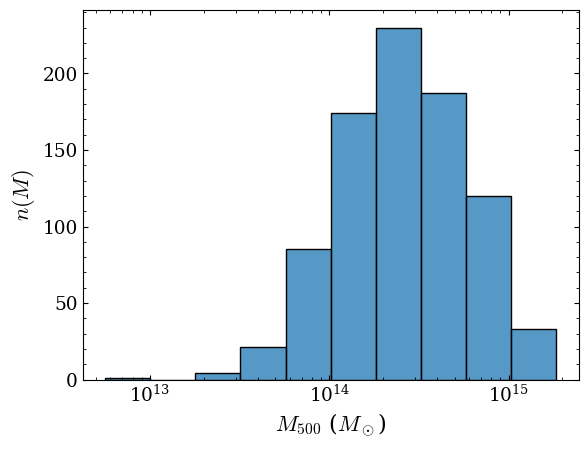

In [24]:
import matplotlib.pyplot as plt
import warnings # Shut up pandas
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
plt.style.use("./nice.mplstyle")
M = cut_data["M500"]
sns.histplot(M, bins=10, log_scale=True)
plt.xlabel("$M_{{500}}$ ($M_\\odot$)")
plt.ylabel("$n(M)$")
plt.show()

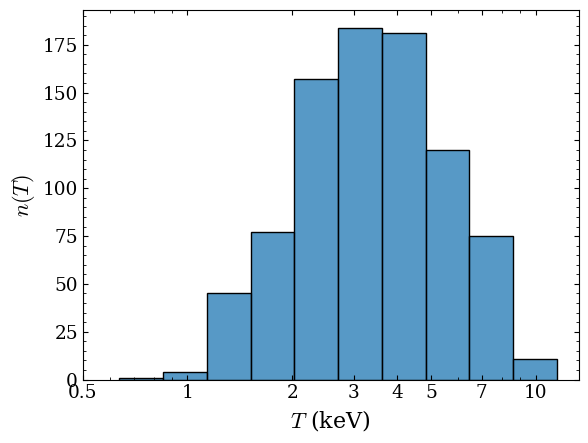

In [25]:
T = cut_data[Columns.T]
sns.histplot(T, bins=10, log_scale=True)
plt.xlabel("$T$ (keV)")
plt.xticks(ticks=[0.5, 1, 2, 3, 4, 5, 7, 10],
    labels=['0.5','1','2','3','4','5','7','10'])
plt.ylabel("$n(T)$")
plt.show()

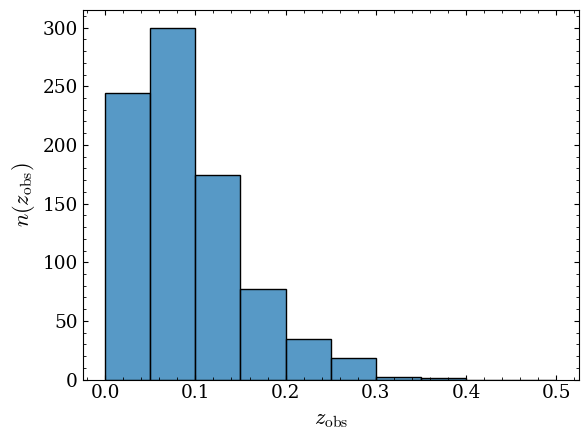

In [26]:
sns.histplot(cut_z_obs, bins=10, binrange=[0., 0.5])
plt.xlabel("$z_\\mathrm{{obs}}$")
plt.ylabel("$n(z_\\mathrm{{obs}})$")
plt.show()

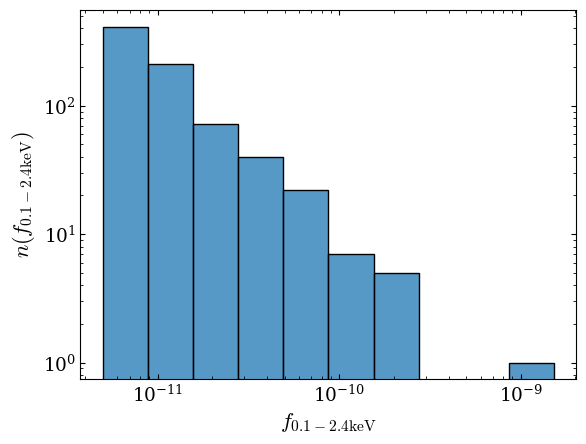

In [16]:
sns.histplot(cut_flux, bins=10, log_scale=[True, True]) #log bin
plt.xlabel("$f_{{0.1-2.4\\mathrm{{keV}}}}$")
plt.ylabel("$n(f_{{0.1-2.4\\mathrm{{keV}}}})$")
plt.show()

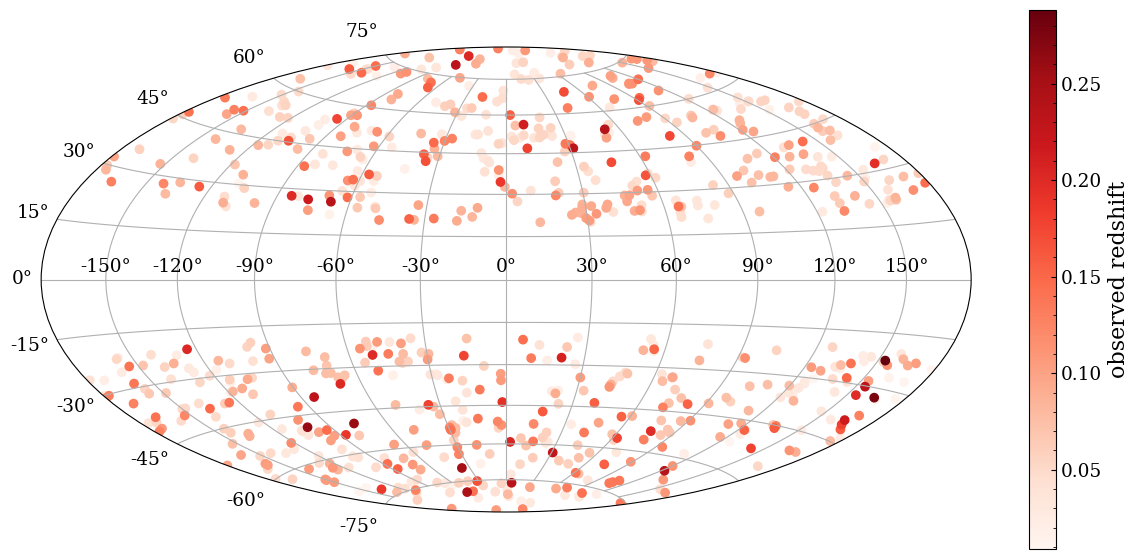

In [17]:
import matplotlib.pyplot as plt
plt.style.use("./nice.mplstyle")
fig = plt.figure(figsize=(15, 7))
ax = plt.subplot(111, projection="hammer")
ax.grid(True)

l = cut_data["phi_on_lc"] * np.pi / 180
b = cut_data["theta_on_lc"] * np.pi / 180

p = ax.scatter(l, b, c=cut_z_obs, cmap="Reds") # takes (longitude, latitude)
# plt.scatter([0, np.pi/4, 0], [0, 0, np.pi/4], marker='+', c='r')

plt.colorbar(p, label="observed redshift", ax=ax)
plt.show()

In [18]:
# Save the data to csv file
# cut_data.to_csv("/data1/yujiehe/data/samples-PLANCK-lightcone0.csv", index=False)

In [19]:
# For Joey
fraction = (cut_data[Columns.LX] - cut_data[Columns.LXCoreExcision]) / cut_data[Columns.LX]
dict = {"id":cut_data["id"], "flux":cut_flux, "L_core/L_tot":fraction}
df = pd.DataFrame(dict)

In [20]:
df.to_csv("./data/id-fraction-to-joey.csv", index=False)

Investigate the sample size overestimation problem.

1. Compare the redshift and flux distribution of different flux cuts with real data.

In [21]:
obs_data = pd.read_csv('/data1/yujiehe/data/obs-redshift-flux.csv', delimiter='\t')
# obs_data = obs_data[obs_data["Flux"] >= flux_cut / 1e-12] # in units 1e-12 erg/s
print("FLAMINGO sample size: {}, Observed sample size: {}.".format(len(cut_data), len(obs_data)))
print("Ratio {}".format(len(cut_data)/len(obs_data)))
obs_data

FLAMINGO sample size: 768, Observed sample size: 380.
Ratio 2.0210526315789474


,Redshift,Flux
0,0.023,266.45
1,0.010,239.02
2,0.040,114.57
3,0.005,102.92
4,0.030,97.63
...,...,...
375,0.059,5.08
376,0.171,5.07
377,0.080,5.04
378,0.165,5.04


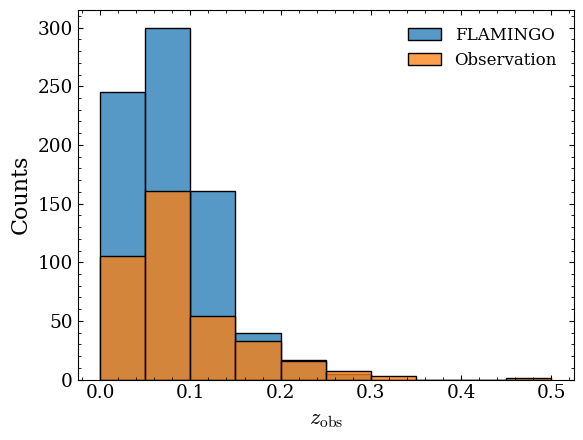

In [22]:
sns.histplot(cut_z_obs, bins=10, binrange=[0., 0.5], label='FLAMINGO')
sns.histplot(obs_data["Redshift"], bins=10, binrange=[0., 0.5], label='Observation')
plt.xlabel("$z_\\mathrm{{obs}}$")
plt.ylabel("Counts")
plt.legend()
plt.show()

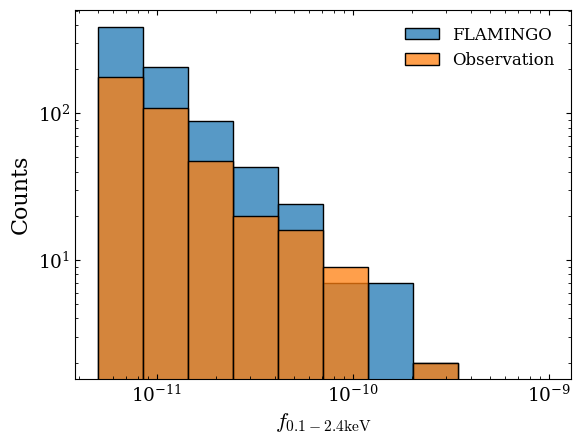

In [23]:
sns.histplot(cut_flux, bins=10, binrange=[np.log10(5e-12), -9], log_scale=[True, True], label='FLAMINGO')
sns.histplot(obs_data["Flux"]*1e-12, bins=10, binrange=[np.log10(5e-12), -9], log_scale=[True, True], label='Observation')
plt.xlabel("$f_{{0.1-2.4\\mathrm{{keV}}}}$")
plt.ylabel("Counts")
plt.legend()
plt.show()

2. Concentration distribution

In [24]:
fraction = (cut_data[Columns.LX] - cut_data[Columns.LXCoreExcision]) / cut_data[Columns.LX]
obs_frac = pd.read_csv('/data1/yujiehe/data/obs-concentration.csv')

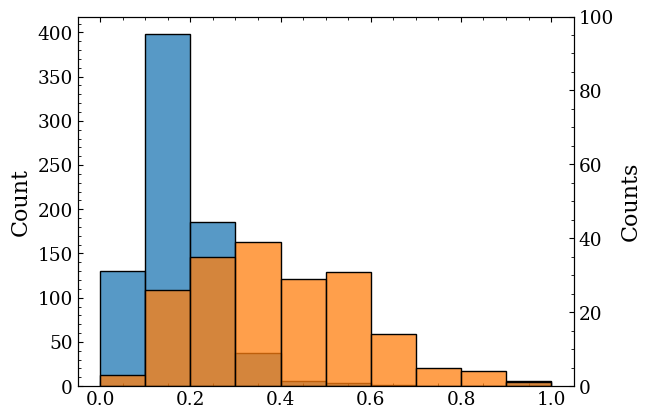

In [25]:
ax = sns.histplot(fraction, bins=10, binrange=[0, 1], label='FLAMINGO')
ax2 = ax.twinx()
sns.histplot(obs_frac['Fraction'], bins=10, binrange=[0, 1], ax=ax2, 
                label='Observation', color='tab:orange')
ax2.set_ylim(0, 100)
plt.xlabel("$L_\\mathrm{{core}}/L_\\mathrm{{tot}}$")
plt.ylabel("Counts")
plt.show()

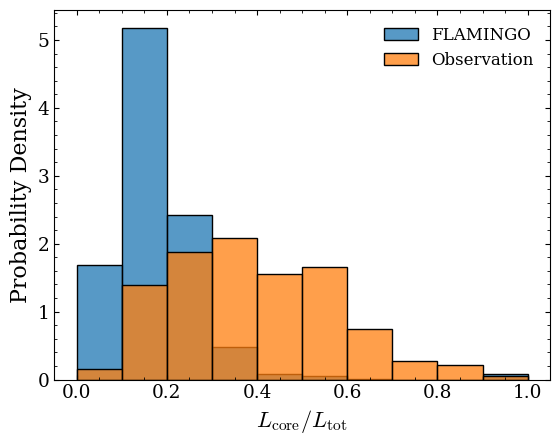

In [26]:
sns.histplot(fraction, bins=10, binrange=[0, 1], label='FLAMINGO', 
                stat='density')
sns.histplot(obs_frac['Fraction'], bins=10, binrange=[0, 1], 
                label='Observation', stat='density')
plt.xlabel("$L_\\mathrm{{core}}/L_\\mathrm{{tot}}$")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

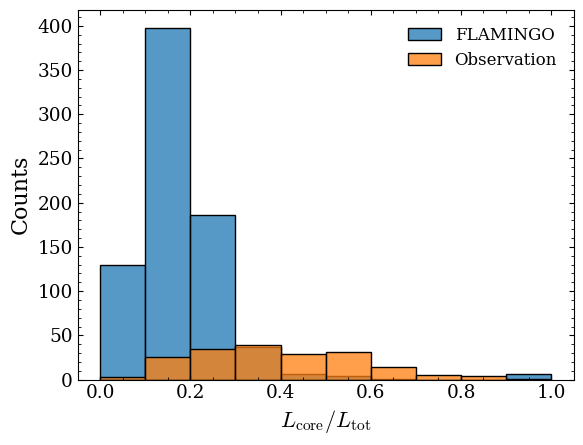

In [27]:
sns.histplot(fraction, bins=10, binrange=[0, 1], label='FLAMINGO')
sns.histplot(obs_frac['Fraction'], bins=10, binrange=[0, 1], 
                label='Observation', color='tab:orange')
# plt.ylim(0, 60)
plt.xlabel("$L_\\mathrm{{core}}/L_\\mathrm{{tot}}$")
plt.ylabel("Counts")
plt.legend()
plt.show()

Sample 313 clusters, and compare with REAL data

First we take the 313 clusters with the highest fractions

In [28]:
from collections import defaultdict
typedict = defaultdict(lambda:np.float64, Catalog=str, Analysed_by=str)
real_data = pd.read_csv('/data1/yujiehe/data/obs-properties.csv', delimiter=',', dtype=typedict)

In [29]:
N = len(fraction)
low_frac = np.quantile(fraction, 1-313/N)
len(fraction[fraction > low_frac])

313

In [30]:
cut_data2 = cut_data[fraction > low_frac] # create a complete data set with this selection

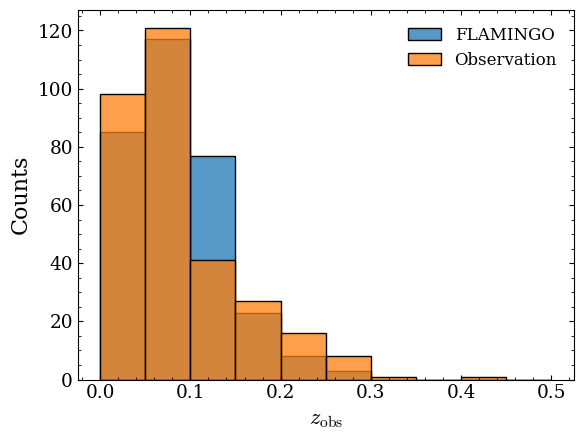

In [31]:
sns.histplot(cut_data2["redshift_obs"], bins=10, binrange=[0., 0.5], 
             label='FLAMINGO')
sns.histplot(real_data["z"], bins=10, binrange=[0., 0.5], 
             label='Observation')
plt.xlabel("$z_\\mathrm{{obs}}$")
plt.ylabel("Counts")
plt.legend()
plt.show()

**Save the fraction cut sample**

In [38]:
cut_data2.to_csv("/data1/yujiehe/data/313-samples-lightcone0.csv", index=False)

#### Draw directly from the distribution
by a random sampling

In [33]:
from sklearn.neighbors import KernelDensity
frac_distr = np.array(obs_frac['Fraction']).reshape(-1,1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.06).fit(frac_distr)

In [35]:
import random
weights = kde.score_samples(np.array(fraction).reshape(-1, 1)) # Use kde as weights
weights = np.exp(weights)
sampled_z = random.choices(np.array(cut_z_obs), weights=weights, k=313)
sampled_frac = random.choices(np.array(fraction), weights=weights, k=313)

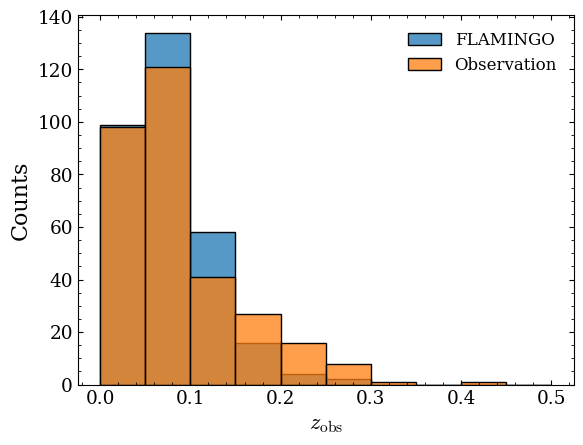

In [36]:
sns.histplot(sampled_z, bins=10, binrange=[0., 0.5], 
             label='FLAMINGO')
sns.histplot(real_data["z"], bins=10, binrange=[0., 0.5], 
             label='Observation')
plt.xlabel("$z_\\mathrm{{obs}}$")
plt.ylabel("Counts")
plt.legend()
plt.show()

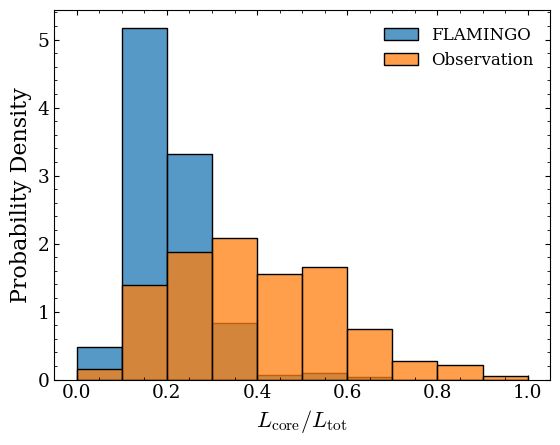

In [37]:
sns.histplot(sampled_frac, bins=10, binrange=[0, 1], label='FLAMINGO', 
                stat='density')
sns.histplot(obs_frac['Fraction'], bins=10, binrange=[0, 1], 
                label='Observation', stat='density')
plt.xlabel("$L_\\mathrm{{core}}/L_\\mathrm{{tot}}$")
plt.ylabel("Probability Density")
plt.legend()
plt.show()